# Modeling

In [1]:
import seaborn as sns
import pandas as pd
import datetime as dt

## Distribution of Classes

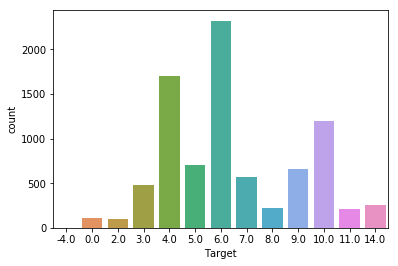

In [2]:
#Distribution of Target Values
Master_tweet_df = pd.read_csv('data/Master_Tweet_modelready.csv')
sns.countplot(x='Target',data=Master_tweet_df)

The distribution of Target Values isn't imbalanced enough to warrant further address.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer 
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Variable Designation

In [4]:
X_values = Master_tweet_df.drop('Target',axis=1)

In [5]:
X = X_values
y= Master_tweet_df.iloc[:,-1]

## Data Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.15)

In [7]:
def datetime_to_int(dt):
    return int(dt.strftime("%Y%m%d"))

In [8]:
X_train['date'] = X_train['date'].astype(int)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Pipeline Creation

In [13]:
clf = Pipeline(steps = [('scaler',StandardScaler()),('dummy',DummyRegressor())])

In [16]:
#Classifer being used in current Pipeline so future changes can be made
Model = DummyRegressor()

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count', 'replies_count','retweets_count','word_count','avg_word_length','stopwords_count',
                   'char_count']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

#categorical_features = ['Target']
#categorical_transformer = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Likely Trump'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        #('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])

## Models

### Baseline Model

In [17]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['likes_count',
                                                   'replies_count',
                                                   'retweets_count',
                                                   'word_count',
                                                   'avg_word_length',
                                                   'stopwords_count',
                                                   'char_count'])])),
                ('classifier', DummyRegressor())])

In [18]:
clf.score(X_test,y_test)

-0.000459830139923012

### Decision Tree Classifier

In [19]:
#Classifer being used in current Pipeline so future changes can be made
Model = DecisionTreeRegressor()

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count', 'replies_count','retweets_count','word_count','avg_word_length','stopwords_count',
                   'char_count']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

#categorical_features = ['Target']
#categorical_transformer = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Likely Trump'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        #('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])

In [20]:
## Finding best parameters
parameters={'criterion': ('mse', 'friedman_mse', 'mae'), 'splitter': ('best', 'random')}

model = DecisionTreeRegressor()

clf_DT = GridSearchCV(model, parameters)
clf_DT.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'splitter': ('best', 'random')})

In [21]:
#Results of GridSearchCV
print('\n ============================================================================================')
print('\n Results of the GridSearchCV on Decision Tree Classifier')
print('\n ============================================================================================')
print('\n The best parameters to use in a model are: \n',clf_DT.best_params_)
print('\n The best score achieved is: \n',clf_DT.best_score_ )



 Results of the GridSearchCV on Decision Tree Classifier


 The best parameters to use in a model are: 
 {'criterion': 'friedman_mse', 'splitter': 'random'}

 The best score achieved is: 
 0.9968030494516296


In [22]:
#fitting and making predictions with model
DT = DecisionTreeRegressor(criterion='mse',splitter='random')
DT.fit(X_train,y_train)
DT.predict(X_test)

array([10., 10.,  5., ...,  4.,  6.,  6.])

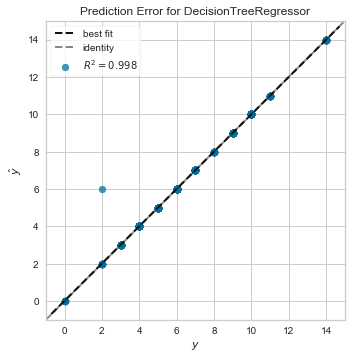

In [23]:
#Prediction Error Matrix
model = DecisionTreeRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Random Forest Classifier

In [27]:
## Finding best parameters
parameters={'n_estimators': (100,300,500,700,900,1100), 'criterion': ('mse', 'mae'),
           'max_features': ('auto', 'sqrt', 'log2')}

model = RandomForestRegressor()

clf_RFC = GridSearchCV(model, parameters)

In [ ]:
clf_RFC.fit(X_train,y_train)

In [ ]:
#Results of GridSearchCV
print('\n ============================================================================================')
print('\n Results of the GridSearchCV on Random Forest Classifier')
print('\n ============================================================================================')
print('\n The best parameters to use in a model are: \n',clf_RFC.best_params_)
print('\n The best score achieved is: \n',clf_RFC.best_score_ )

In [ ]:
#Classifer being used in current Pipeline so future changes can be made
Model = RandomForestClassifier(criterion='gini',max_features='auto',n_estimators=100)

#splitting dataframe into numeric and categoric columns
numeric_features = ['likes_count', 'replies_count','retweets_count','word_count','avg_word_length','stopwords_count',
                   'char_count','Biden (D)','Trump (R)']
numeric_transformer = Pipeline([('scaler',StandardScaler())])

#categorical_features = ['Target']
#categorical_transformer = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Likely Trump'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        #('cat', categorical_transformer, categorical_features)])

clf_RFC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Model)])

In [ ]:
#Fitting the model
clf_RFC.fit(X_train,y_train)

In [ ]:
#Making predictions with the model
clf_RFC.predict(X_test)

In [ ]:
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()